In [24]:
in_file = "data.csv"
out_file = "kion10y.csv"

# CSVファイルを一行ずつ読み込み ---(*1)
with open(in_file, "rt", encoding="Shift_JIS") as fr:
    lines = fr.readlines()

# ヘッダをそぎ落として、新たなヘッダをつける ---(*2)
# \n : ____________________________
lines = ["年,月,日,気温,品質,均質\n"] + lines[5:]
lines = map(lambda v: v.replace('/', ','), lines)
result = ''.join(lines).strip()
print(result)

# 結果をファイルへ出力 ---(*3)
with open(out_file, 'wt', encoding='utf-8') as fw:
    fw.write(result)
    print("saved.")


年,月,日,気温,品質,均質
2012,5,23,18.7,8,1
2012,5,24,22.0,8,1
2012,5,25,20.4,8,1
2012,5,26,21.0,8,1
2012,5,27,22.5,8,1
2012,5,28,21.4,8,1
2012,5,29,20.7,8,1
2012,5,30,20.1,8,1
2012,5,31,20.3,8,1
2012,6,1,21.3,8,1
2012,6,2,21.6,8,1
2012,6,3,20.3,8,1
2012,6,4,22.1,8,1
2012,6,5,21.7,8,1
2012,6,6,19.4,8,1
2012,6,7,21.1,8,1
2012,6,8,23.5,8,1
2012,6,9,19.0,8,1
2012,6,10,21.9,8,1
2012,6,11,20.0,8,1
2012,6,12,16.9,8,1
2012,6,13,17.4,8,1
2012,6,14,18.6,8,1
2012,6,15,20.3,8,1
2012,6,16,20.2,8,1
2012,6,17,23.3,8,1
2012,6,18,24.5,8,1
2012,6,19,23.9,8,1
2012,6,20,26.9,8,1
2012,6,21,23.7,8,1
2012,6,22,21.1,8,1
2012,6,23,22.2,8,1
2012,6,24,22.6,8,1
2012,6,25,18.4,8,1
2012,6,26,19.5,8,1
2012,6,27,20.6,8,1
2012,6,28,22.5,8,1
2012,6,29,23.4,8,1
2012,6,30,23.3,8,1
2012,7,1,21.9,8,1
2012,7,2,22.8,8,1
2012,7,3,23.5,8,1
2012,7,4,24.8,8,1
2012,7,5,26.7,8,1
2012,7,6,25.3,8,1
2012,7,7,23.0,8,1
2012,7,8,22.6,8,1
2012,7,9,24.9,8,1
2012,7,10,26.5,8,1
2012,7,11,27.0,8,1
2012,7,12,26.7,8,1
2012,7,13,27.4,8,1
2012,7,14,28.6,

In [25]:
import pandas as pd

# PandasでCSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる ---(*2)
# iterrows:___________________________※次のセルにヒントあり
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = '{:02d}/{:02d}'.format(m, d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める ---(*3)
avs = {}
# sorted :___________________________
for key in sorted(md):
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))

01/01 : 5.95
01/02 : 6.130000000000001
01/03 : 5.7700000000000005
01/04 : 5.94
01/05 : 5.930000000000001
01/06 : 5.76
01/07 : 5.569999999999999
01/08 : 5.3
01/09 : 6.790000000000001
01/10 : 5.96
01/11 : 5.6499999999999995
01/12 : 4.6899999999999995
01/13 : 5.87
01/14 : 5.31
01/15 : 4.779999999999999
01/16 : 6.28
01/17 : 6.01
01/18 : 4.85
01/19 : 5.62
01/20 : 5.249999999999999
01/21 : 5.459999999999999
01/22 : 5.289999999999999
01/23 : 5.58
01/24 : 5.29
01/25 : 5.5600000000000005
01/26 : 5.37
01/27 : 6.37
01/28 : 5.92
01/29 : 6.6
01/30 : 6.459999999999999
01/31 : 6.0
02/01 : 5.83
02/02 : 7.099999999999999
02/03 : 7.410000000000001
02/04 : 7.2
02/05 : 5.76
02/06 : 4.999999999999999
02/07 : 5.68
02/08 : 4.7
02/09 : 4.0600000000000005
02/10 : 4.9
02/11 : 5.46
02/12 : 5.99
02/13 : 7.159999999999999
02/14 : 7.69
02/15 : 7.13
02/16 : 6.890000000000001
02/17 : 6.9399999999999995
02/18 : 5.680000000000001
02/19 : 6.709999999999999
02/20 : 7.74
02/21 : 7.6
02/22 : 7.44
02/23 : 8.000000000000002


pandas.DataFrameのforループ処理（イテレーション）

https://note.nkmk.me/python-pandas-dataframe-for-iteration/


# 誕生日の平均気温を求めましょう


In [26]:
# あなたの誕生日の過去10年間の平均気温を表示しましょう
avs['12/12']

# ここまでやる！

9.41

ここから全員で作業

Matplotの日本語化を行いましょう

Anaconda Promptにて以下を実行

import japanize_matplotlib

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Matplotの日本語化
import japanize_matplotlib

# CSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]

# groupbyしたdataframeはgroupbyオブジェクトとなるため、そのままでは内容を表示できない
print(g)


In [28]:
# 合計したり、カウントすることで表示が可能になる。
# 合計値を表示
print(g.sum())

月
1     1773.1
2     1878.4
3     3342.4
4     4457.5
5     6165.1
6     6723.0
7     8121.2
8     8651.8
9     7164.7
10    5780.8
11    3971.3
12    2465.9
Name: 気温, dtype: float64


月
1      5.719677
2      6.660993
3     10.781935
4     14.858333
5     19.887419
6     22.410000
7     26.197419
8     27.909032
9     23.882333
10    18.647742
11    13.237667
12     7.954516
Name: 気温, dtype: float64


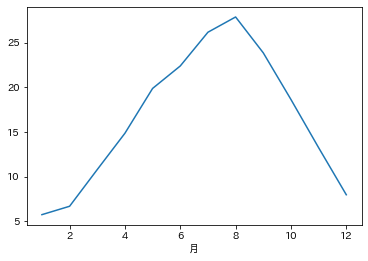

In [29]:
# 合計÷平均
gg = g.sum() / g.count()

# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

年
2012     8
2013    16
2014    12
2015     7
2016     1
2017     1
2018    11
2019     7
2020     9
2021     2
Name: 年, dtype: int64


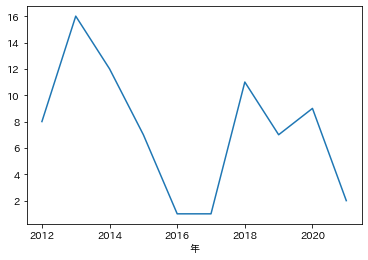

In [30]:
# 気温30度を超えるのは何日？？

import matplotlib.pyplot as plt
import pandas as pd
# ファイルを読む
df = pd.read_csv('kion10y.csv', encoding="utf-8")
# 気温が30度超えのデータを調べる ---(*1)
atui_bool = (df["気温"] > 30)
# データを抜き出す ---(*2)
atui = df[atui_bool]
# 年ごとにカウント ---(*3)
cnt = atui.groupby(["年"])["年"].count()
# 出力
print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

C:\Users\k_kurosaki\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


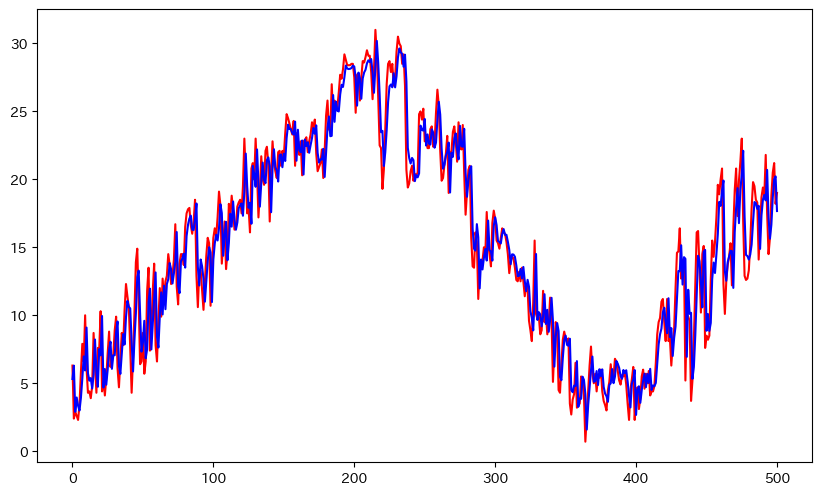

In [37]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する ---(*1)
train_year = (df["年"] <= 2020)
test_year = (df["年"] >= 2021)
interval = 6

# 過去6日分を学習するデータを作成 ---(*2)
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data['気温'])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)
    
# テキストを参考に実装    

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression(normalize = True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

In [32]:
pre_y - test_y

array([-9.87344173e-01,  3.89546474e+00, -3.77383971e-03,  1.35093098e+00,
        1.04489584e+00, -4.07454172e-01, -1.87795263e+00, -2.56253410e+00,
        3.75371786e-01, -4.05836366e+00,  2.99633494e+00,  1.43569603e+00,
        7.88333306e-01,  1.48303614e+00, -1.85110566e-01, -3.08102170e+00,
        1.81734708e+00,  1.56584775e+00, -2.86122043e+00,  6.05902896e-03,
       -3.24594513e+00,  5.54657114e+00, -6.18763752e-01,  1.94383542e+00,
       -5.06617141e-01, -1.19428125e+00, -1.35744284e+00,  1.85202400e+00,
       -9.38359035e-01, -4.81968248e-02, -1.83868324e+00, -1.15824072e+00,
        3.44438895e+00,  1.55798996e+00, -1.00830385e+00, -1.50987994e+00,
        8.11353529e-01, -2.54764817e+00, -2.44084237e+00, -3.41053434e-01,
        2.49870815e-02,  2.90422438e+00,  3.77092509e+00, -1.03288448e+00,
       -2.03136219e+00, -3.78260876e+00, -2.08464869e+00,  2.28547830e+00,
        3.76188878e+00,  7.24078994e-01, -6.81001681e-01,  3.89315060e+00,
        2.40024606e-01, -

In [33]:
diff_y = abs(pre_y - test_y)
print('average=', sum(diff_y) / len(diff_y))
print('max=', max(diff_y))

average= 1.5570442016058696
max= 8.954397513792784
